In [5]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import mutagen


In [6]:

import json


flac_files = [
    f
    for f in os.listdir(
        "M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1"
    )
    if f.endswith(".flac")
]


with open("../tracks_info.json", "r") as f:
    tracks_info = json.load(f)

C:\Users\Benja\AppData\Local\Temp\ipykernel_2012\2324866549.py:36: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(Z)), aspect='auto',


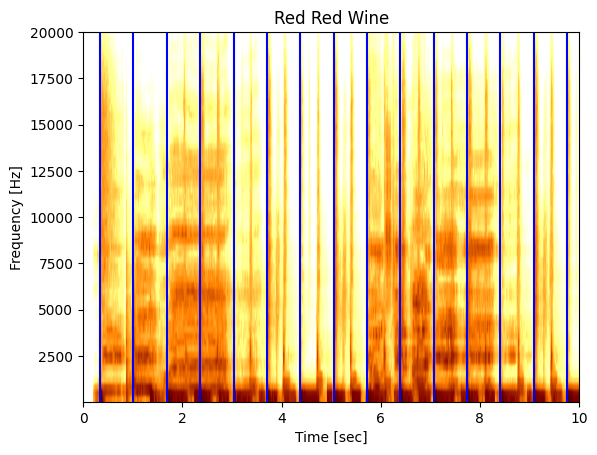

In [35]:

import numpy as np
import scipy.io.wavfile
from scipy.signal import stft
import matplotlib.pyplot as plt

i = 2
file = flac_files[i]


# Load the FLAC file and slice the first 10 seconds (pydub works in milliseconds)
audio = AudioSegment.from_file(
    f"M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1/{file}"
)[:10000]
# Extract metadata
metadata = mutagen.File(
    f"M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1/{file}",
    easy=True,
)
track_name = metadata["title"][0] if "title" in metadata else "Unknown"

# Convert the audio to a numpy array
samples = np.array(audio.get_array_of_samples())

# Create a spectrogram
frequencies, times, spectrogram = signal.spectrogram(samples)

# Extract tempos from tracks_info
tempos = tracks_info[track_name]["Tempos"] if track_name in tracks_info else []

# Plot the spectrogram

sound = samples.astype(float) / np.max(np.abs(samples))

frequency, time, Z = stft(sound, fs=44100 * 2, )
# Display log-magnitude spectrogram
plt.imshow(np.log(np.abs(Z)), aspect='auto', 
           vmin=-9, vmax=0, origin='lower', 
           extent=[0, np.max(time), 0, np.max(frequency)], 
           cmap='afmhot_r')
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.ylim([20, 20000])
plt.title(track_name)
# log scale the y axis to get better frequency resolution



for index in range(len(tempos)):
    if float(tempos[index]["tempo_inizio"]) > 10:
        break
    start_time = float(tempos[index]["tempo_inizio"])
    bpm = float(tempos[index]["tempo_bpm"])
    end_time = 10
    if index < len(tempos) - 1 and float(tempos[index + 1]["tempo_inizio"]) < 10:
        end_time = float(tempos[index + 1]["tempo_inizio"])
    beats = []
    # add beats but do not exceed end_time. Use the bpm to calculate the time between beats
    while start_time < end_time:
        beats.append(start_time)
        start_time += 60 / bpm
    for beat in beats:
        plt.axvline(x=beat, color='b', )  # plot a red vertical line at each beat
        # add a clicking sound to the audio at each beat
        click = AudioSegment.from_wav("click.wav")
        audio = audio.overlay(click, position=beat * 1000)
    


plt.savefig(f"spectrogram_{track_name}.png")

In [32]:
audio

In [17]:
samples

array([   0,    0,    0, ...,  729, -943,  305], dtype=int16)